In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import richardsplot as rplot
from astropy.cosmology import FlatLambdaCDM

/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def upper_limit(x, y, ax):
    ax.annotate('', xy=(x, y), xytext=(-44, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.5, head_length=0.8"))
    
def radluminosity(nu1, nu2, S_nu2, alpha, z):
    #calculate luminosity at nu1 based on data at nu2
    #input flux density units are µJy
    DL = 3.086e24*cosmo.luminosity_distance(z).value
    L = ((4*np.pi*DL**2*(S_nu2*1e-23*1e-6)) / ((1+z)**(1+alpha))) * (nu1/nu2)**alpha * 1e-7
    return np.log10(L)

In [3]:
rqq = pd.read_csv("RQQfigs.csv")
rqq.head()

,Name,Maj,Min,S1p4_FIRST,S1p4_err,A_morph,C_morph,Flux,FluxErr,PFimfit,...,logL,i,I_2a,MI_Z2,LOGL2500,R,LD_cm,Kell_Ratio,logL6GHz [W/Hz],MJD_dr7
0,0808+4407,472.0,237.0,NaN,NaN,U,U,36.3,8.300000,36.3,...,22.12,17.615,-22.58,-23.605438,29.601365,0.19,4.389983e+27,0.6,21.901570,NaN
1,0816+4258,153.0,105.0,NaN,NaN,SR,U,199.0,14.000000,178.5,...,22.54,16.636,-23.21,-23.978752,29.750691,0.29,3.651811e+27,0.9,22.485202,NaN
2,0822+4553,150.0,89.0,427,127.0,M,U,531.0,33.015148,425.0,...,22.77,17.695,-22.69,-23.688601,29.634631,0.73,4.852865e+27,2.4,23.151097,51868.0
3,0834+3826,238.0,39.0,NaN,NaN,U,U,116.8,7.100000,116.8,...,22.49,17.527,-22.77,-23.800290,29.679306,0.36,4.629499e+27,0.9,22.453822,NaN
4,0843+5357,838.0,168.0,516,150.0,E,U,349.0,31.000000,122.8,...,22.72,16.440,-23.25,-23.912282,29.724103,0.43,3.371040e+27,0.9,22.661519,NaN


In [4]:
size = (rqq["sz_maj"].values != 0.) #Only consider sources we have a size estimate for
smin = rqq["sz_min"].values[size]
smaj = rqq["sz_maj"].values[size]

gmean = np.sqrt(smin*smaj)

In [5]:
morph = rqq["A_morph"].values[size]
U = (morph=="U")
R = ~U #no non-detections from size mask

In [6]:
smin[U]

array([446. , 354. , 413. , 275. , 243. , 358. , 398. , 344. , 383. ,
       410. , 365.8, 354. , 391. , 337. , 366. , 409.9, 381.5, 339.8,
       448. , 434. , 377. , 400. , 328. , 345. , 330. , 401.1, 390. ,
       317. , 364. , 481. , 397. , 381. , 336. , 367.2, 357.1, 390. ,
       347. ])

In [7]:
cosmo.angular_diameter_distance(.2) #this gives Mpc/radian

<Quantity 680.60269921 Mpc>

In [8]:
cosmo.angular_diameter_distance(.25).value/206265. #this gives Mpc/marcsec

0.003910077627389991

In [9]:
z = rqq["z"].values[size]
smin_lin = smin*cosmo.angular_diameter_distance(z).value/206265.
smaj_lin = smaj*cosmo.angular_diameter_distance(z).value/206265.

gmean_lin = np.sqrt(smin_lin*smaj_lin)

In [11]:
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

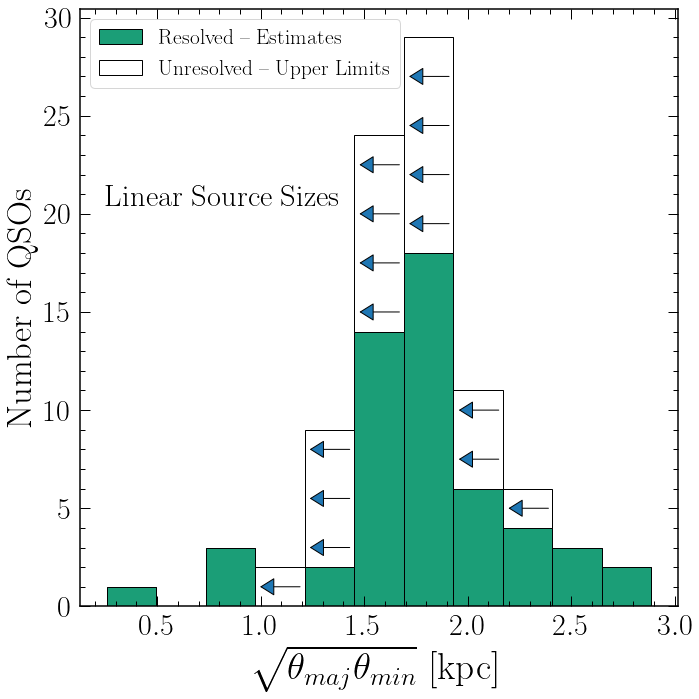

In [12]:
fig = plt.figure(figsize=(10,10))

n,b,patches = plt.hist([gmean_lin[R], gmean_lin[U]], color=[rplot.csdark[0], "w"], edgecolor="k", 
              histtype="barstacked", bins=11, label=["Resolved -- Estimates", "Unresolved -- Upper Limits"])

#Need to do hatches manually since matplotlib doesn't
#let you separate them for separate data series
hatches = ['', '<']
for patch_set, hatch in zip(patches, hatches):
    for patch in patch_set.patches:
        patch.set_hatch(hatch)
        
upper_limit(1.2, 1, plt.gca())

upper_limit(1.44, 3, plt.gca())
upper_limit(1.44, 5.5, plt.gca())
upper_limit(1.44, 8, plt.gca())

upper_limit(1.68, 15, plt.gca())
upper_limit(1.68, 17.5, plt.gca())
upper_limit(1.68, 20, plt.gca())
upper_limit(1.68, 22.5, plt.gca())

upper_limit(1.92, 19.5, plt.gca())
upper_limit(1.92, 22, plt.gca())
upper_limit(1.92, 24.5, plt.gca())
upper_limit(1.92, 27, plt.gca())

upper_limit(2.16, 7.5, plt.gca())
upper_limit(2.16, 10, plt.gca())

upper_limit(2.40, 5, plt.gca())
"""
upper_limit(0.58, 19.5, plt.gca())
upper_limit(0.58, 23.5, plt.gca())

upper_limit(0.98, 23.5, plt.gca())
upper_limit(0.98, 27.5, plt.gca())

upper_limit(1.38, 11.5, plt.gca())
upper_limit(1.38, 15.5, plt.gca())
upper_limit(1.38, 19.5, plt.gca())

upper_limit(1.78, 8.5, plt.gca())

upper_limit(2.18, 3.5, plt.gca())

upper_limit(2.58, 2.5, plt.gca())

upper_limit(2.98, 1.5, plt.gca())

upper_limit(3.38, 2.0, plt.gca())

upper_limit(4.97, 2.5, plt.gca())

"""
plt.xlabel("$\sqrt{\\theta_{maj}\\theta_{min}}$ [kpc]", fontsize=37.5)
plt.ylabel("Number of QSOs", fontsize=35)
plt.legend(loc="upper left", prop={"size": 21.5})
plt.tick_params(axis='both', which='major', labelsize=30)
plt.text(0.25, 20.4, "Linear Source Sizes", fontsize=30.5)
#plt.text(0.50, 21.0, "Source Sizes", fontsize=22.5)
plt.tight_layout()
plt.savefig("PaperPlots/sourcesizes_geommean.pdf")
plt.show()

In [25]:
b

array([0.25685354, 0.4959296 , 0.73500566, 0.97408172, 1.21315778,
       1.45223385, 1.69130991, 1.93038597, 2.16946203, 2.40853809,
       2.64761415, 2.88669021])

In [16]:
#Whar percent of sources have emission constrained to <1.5kpc?
(gmean_lin<1.5).sum() / len(gmean_lin)

0.7843137254901961

In [114]:
S6 = rqq[["PFimfit"]].values.flatten()[size]
L6 = radluminosity(6., 6., S6, -0.7, z)

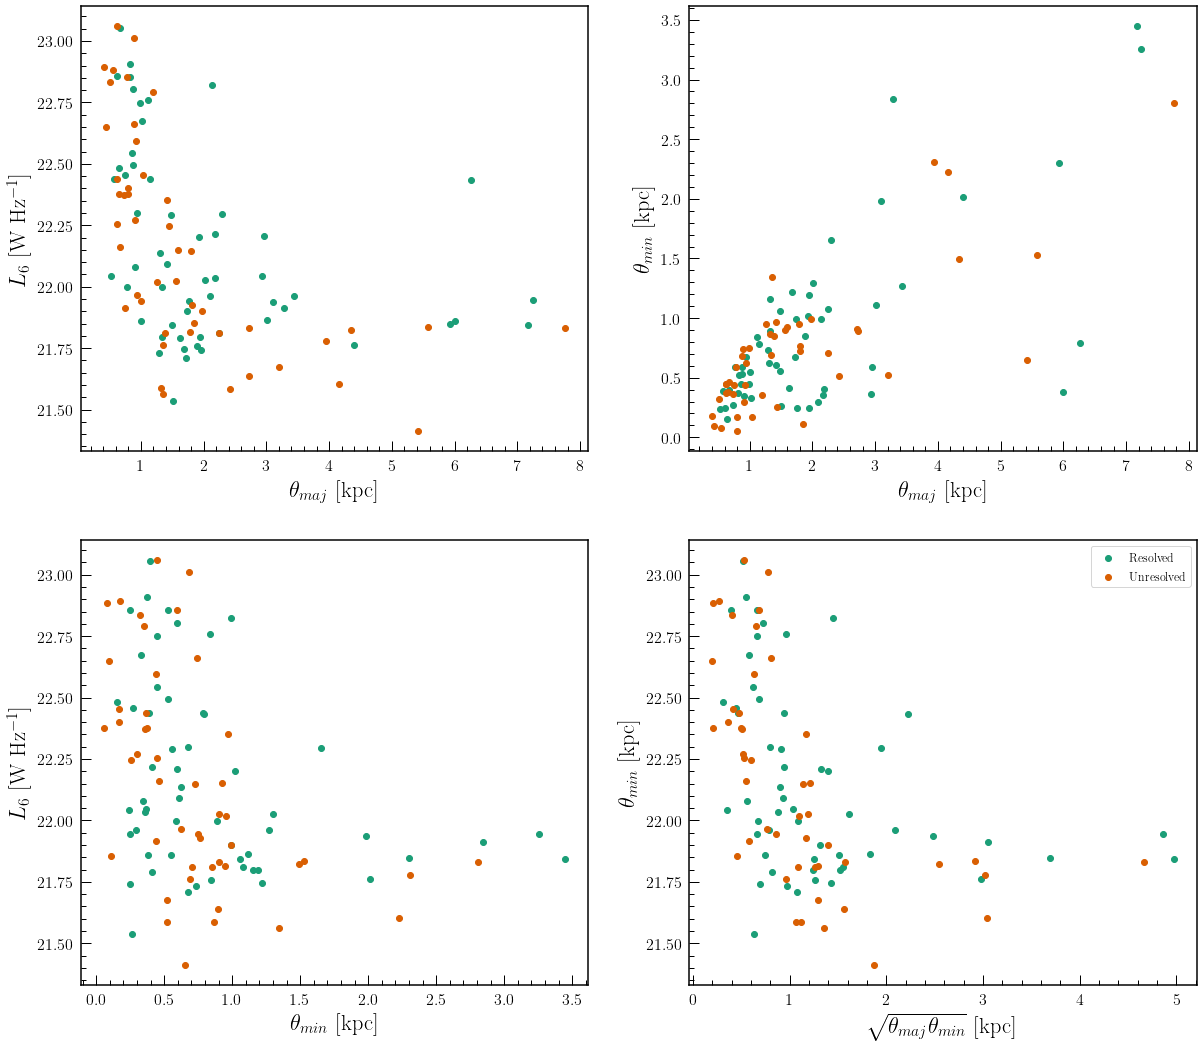

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(20,18))

axs[0,0].scatter(smaj_lin[R], L6[R], color=rplot.csdark[0])
axs[0,0].scatter(smaj_lin[U], L6[U], color=rplot.csdark[1])
axs[0,0].set_xlabel("$\\theta_{maj}$ [kpc]", fontsize=22.5)
axs[0,0].set_ylabel("$L_6$ [W Hz$^{-1}$]", fontsize=22.5)

axs[1,0].scatter(smin_lin[R], L6[R], color=rplot.csdark[0])
axs[1,0].scatter(smin_lin[U], L6[U], color=rplot.csdark[1])
axs[1,0].set_xlabel("$\\theta_{min}$ [kpc]", fontsize=22.5)
axs[1,0].set_ylabel("$L_6$ [W Hz$^{-1}$]", fontsize=22.5)

axs[0,1].scatter(smaj_lin[R], smin_lin[R], color=rplot.csdark[0])
axs[0,1].scatter(smaj_lin[U], smin_lin[U], color=rplot.csdark[1])
axs[0,1].set_xlabel("$\\theta_{maj}$ [kpc]", fontsize=22.5)
axs[0,1].set_ylabel("$\\theta_{min}$ [kpc]", fontsize=22.5)

axs[1,1].scatter(gmean_lin[R], L6[R], color=rplot.csdark[0], label="Resolved")
axs[1,1].scatter(gmean_lin[U], L6[U], color=rplot.csdark[1], label="Unresolved")
axs[1,1].set_xlabel("$\sqrt{\\theta_{maj}\\theta_{min}}$ [kpc]", fontsize=22.5)
axs[1,1].set_ylabel("$\\theta_{min}$ [kpc]", fontsize=22.5)
axs[1,1].legend(loc="best")

plt.show()